In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ignore Warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# load the datset
data = pd.read_csv("C:/DSA COURSE/TCSion/Dataset/salarydata.csv")
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Target ----> salary

# Pre processing & Exploratory Data Analysis

In [4]:
# Shape
data.shape

(32561, 14)

In [5]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
#describe
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#check null value
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
#Columns
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [9]:
#datatypes of columns
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

# Data Understanding

In [10]:
data.head(25)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
data.tail(25)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32536,34,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32537,30,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K
32538,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


In [12]:
#check the unique values of workclass
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
# count of each unique values
data["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
#check the unique values of native-country
data["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [15]:
# count of each unique values
data["native-country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [16]:
# check the unique values of occupation
data["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [17]:
# count the unique values
data["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
# Replace "?" with NaN
data[["workclass","native-country","occupation"]]=data[["workclass","native-country","occupation"]].replace("?",np.NaN)

In [19]:
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [20]:
data["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [21]:
data["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [22]:
#check null values
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [23]:
# Percentage of null values
data.isnull().sum()*100/len(data)

age               0.000000
workclass         5.638647
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
salary            0.000000
dtype: float64

In [24]:
data.iloc[14,:]

age                               40
workclass                    Private
education                  Assoc-voc
education-num                     11
marital-status    Married-civ-spouse
occupation              Craft-repair
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country                   NaN
salary                          >50K
Name: 14, dtype: object

In [25]:
data.head(25)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [26]:
# fill the word "missing " in the place of categorical null values
for i in ['workclass','native-country','occupation']:
    data[i] = data[i].fillna('Missing')

In [27]:
data.iloc[32542,:]

age                               72
workclass                    Missing
education                    HS-grad
education-num                      9
marital-status    Married-civ-spouse
occupation                   Missing
relationship                 Husband
race                           White
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    25
native-country         United-States
salary                         <=50K
Name: 32542, dtype: object

In [28]:
#check null values
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [29]:
data.shape

(32561, 14)

In [30]:
#drop the duplicate value
data.drop_duplicates(inplace=True)

In [31]:
data.shape

(29096, 14)

In [32]:
data.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Data Visualization

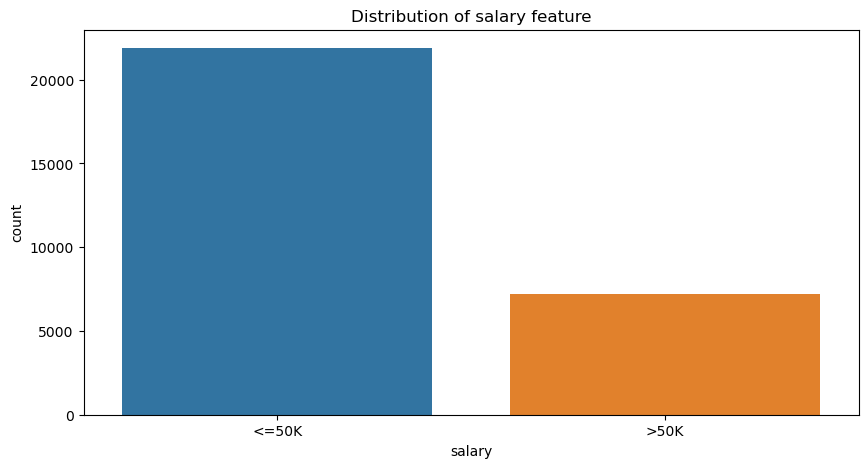

In [33]:
# Countplot of Salary
plt.figure(figsize=(10,5))
x=sns.countplot(x="salary",data=data)
x.set(title="Distribution of salary feature")
plt.show()

Salary <=50k has the highest count compared to >50K

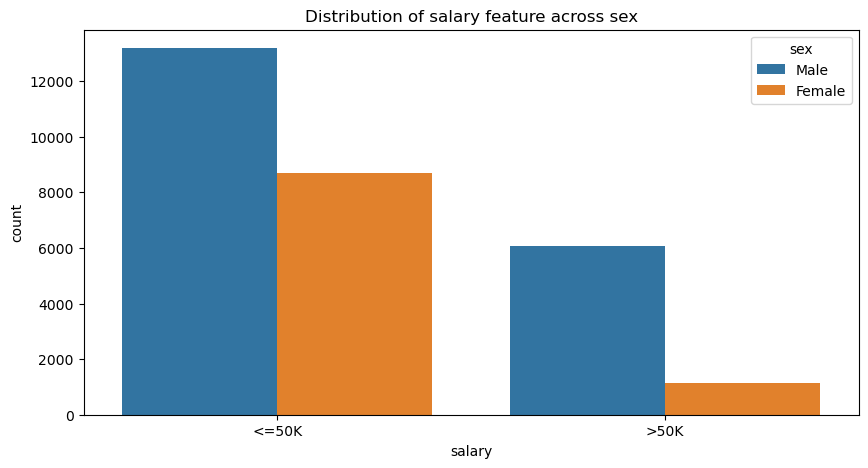

In [34]:
plt.figure(figsize=(10,5))
x=sns.countplot(x="salary",data=data,hue="sex")
x.set(title="Distribution of salary feature across sex")
plt.show()

Male's salary has the highest count in both <=50K & >50K

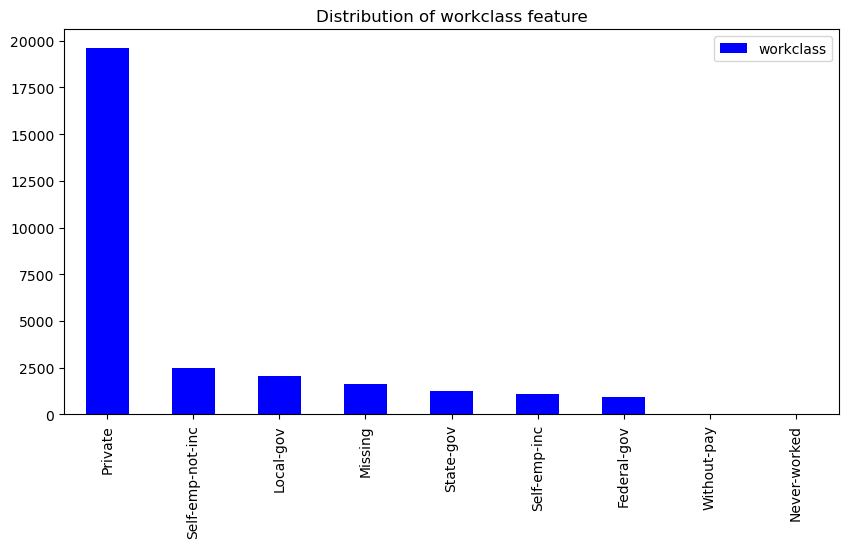

In [35]:
plt.figure(figsize=(10,5))
x=data.workclass.value_counts().plot(kind="bar",color="blue",legend="True")
x.set(title="Distribution of workclass feature")
plt.show()

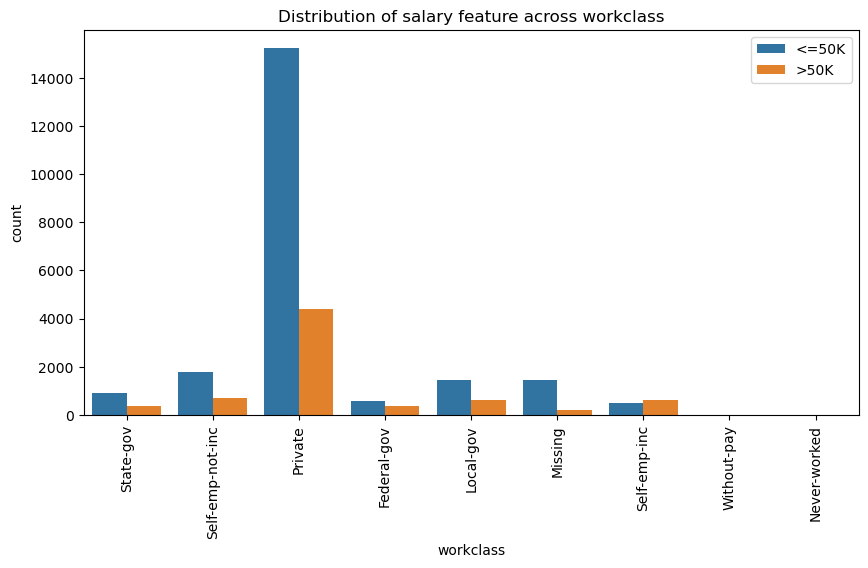

In [36]:
plt.figure(figsize=(10,5))
x=sns.countplot(x="workclass",hue="salary",data=data)
x.set(title="Distribution of salary feature across workclass")
x.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

Private workclass has the highest salary count

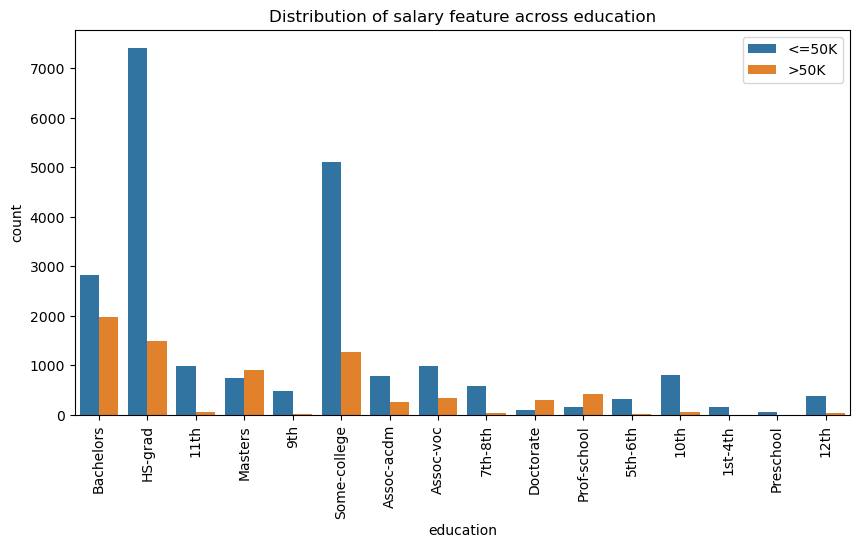

In [37]:
plt.figure(figsize=(10,5))
x=sns.countplot(x="education",hue="salary",data=data)
x.set(title="Distribution of salary feature across education")
x.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

HS-grad education has the highest count in <=50K salary and Bachekors education has the highest count in >50K salary

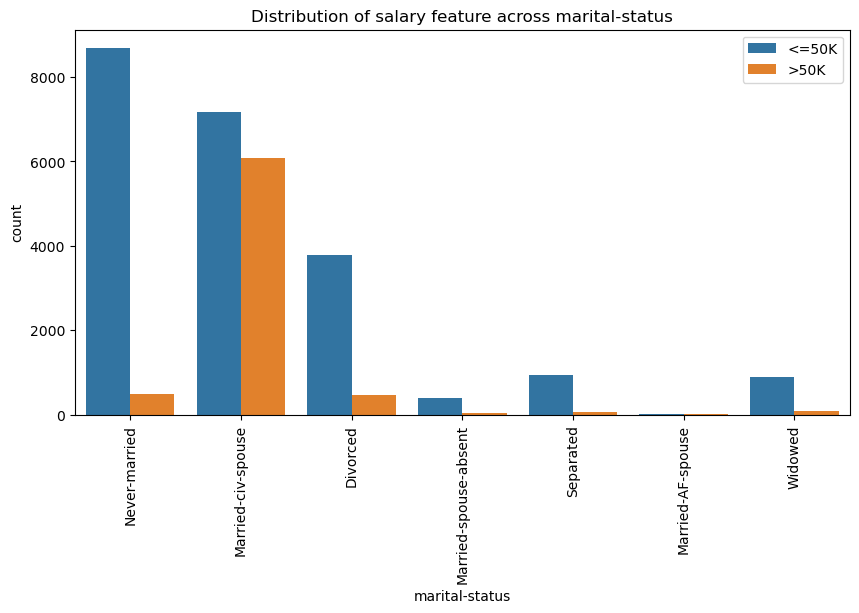

In [38]:
plt.figure(figsize=(10,5))
x=sns.countplot(x="marital-status",hue="salary",data=data)
x.set(title="Distribution of salary feature across marital-status")
x.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

Never-married matrital-status peoples got highest count in <=50K salary

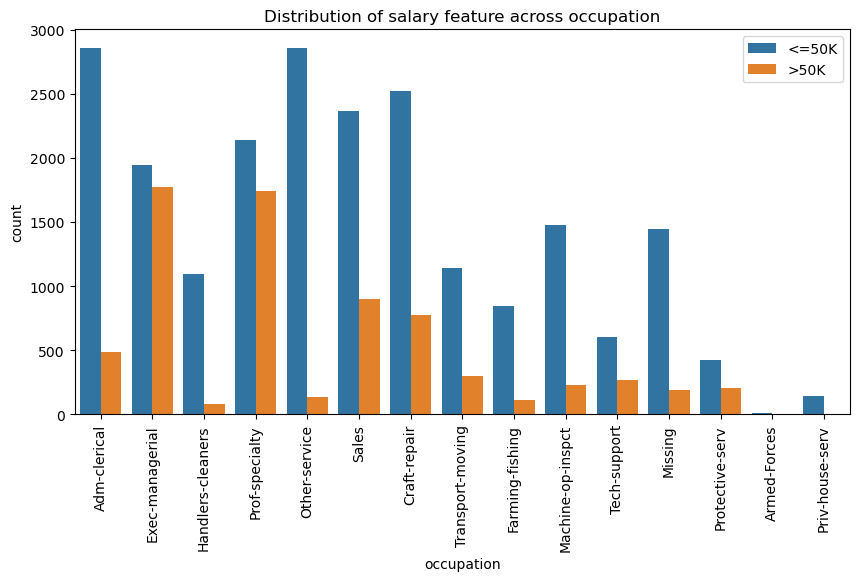

In [39]:
plt.figure(figsize=(10,5))
x=sns.countplot(x="occupation",hue="salary",data=data)
x.set(title="Distribution of salary feature across occupation")
x.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

Exec-managerial and prof-specialty occupations have highest salary(>50K) count

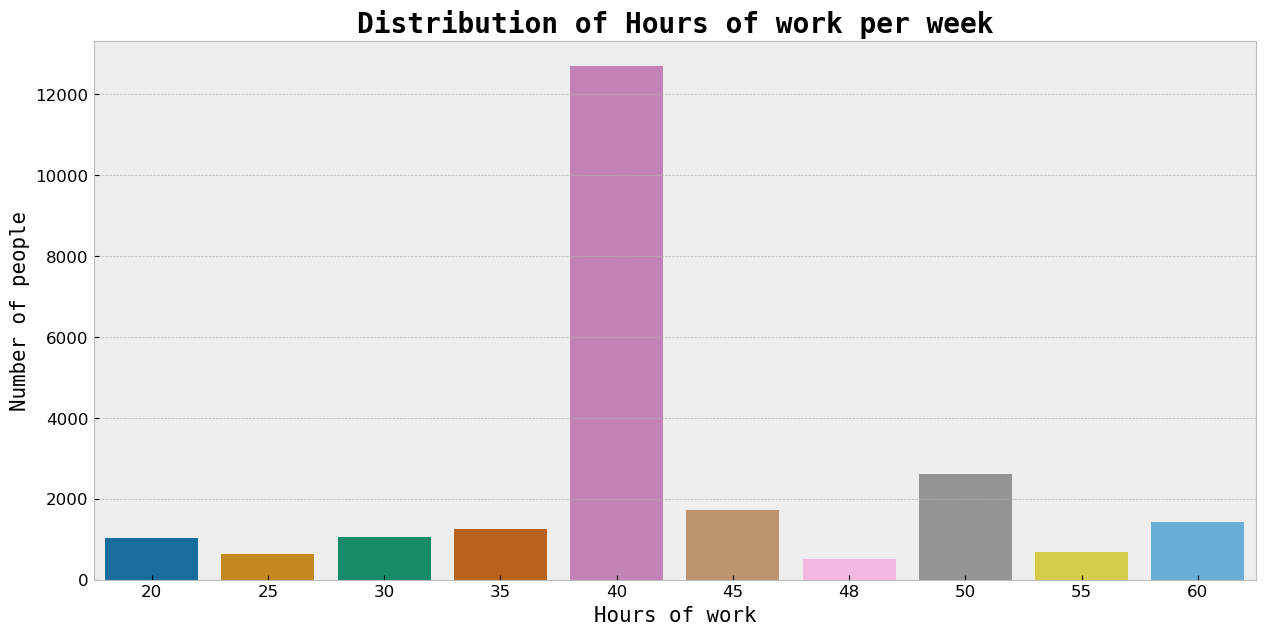

In [40]:
# Creating a barplot for 'Hours per week'
hours = data['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

More than 12000 peoples work in 40 hours

In [41]:
data["salary"].value_counts().unique()

array([21886,  7210], dtype=int64)

In [42]:
data["salary"].unique()

array(['<=50K', '>50K'], dtype=object)

In [43]:
data["salary"] = data["salary"].replace(('<=50K', '>50K'),(0,1))

In [44]:
data["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
32554    1
32555    0
32556    0
32558    0
32560    1
Name: salary, Length: 29096, dtype: int64

In [45]:
data.head(4)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [46]:
data.drop(["education","capital-gain","capital-loss"],axis=1,inplace=True)

In [47]:
data.head(4)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0


In [48]:
data.shape

(29096, 11)

In [49]:
#Correlation
data.corr()

,age,education-num,hours-per-week,salary
age,1.000000,0.030144,0.039831,0.215270
education-num,0.030144,1.000000,0.141446,0.332210
hours-per-week,0.039831,0.141446,1.000000,0.226323
salary,0.215270,0.332210,0.226323,1.000000


<AxesSubplot:>

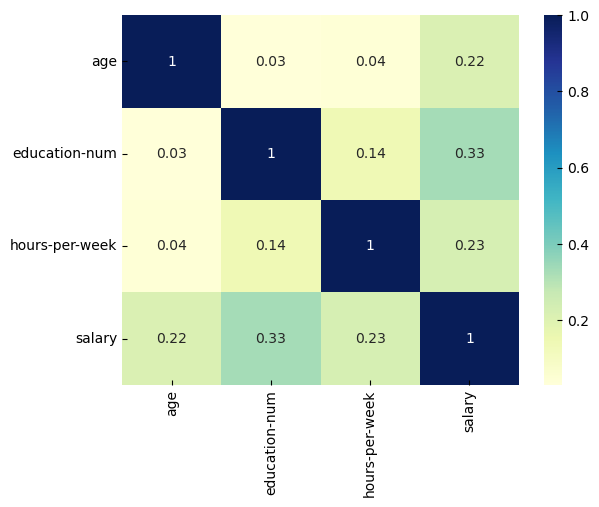

In [50]:
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")

From the correlation heatmap, I can see that the dependent feature 'salary' is highly correlated with age, education num, and number of hours per week.

# Data Preprocessing

In [51]:
#encoding of data
data=pd.get_dummies(data)

In [52]:
data.head(5)

,age,education-num,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data.shape

(29096, 90)

In [54]:
data.corr()

,age,education-num,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,0.030144,0.039831,0.215270,0.044871,0.052125,0.063578,-0.021172,-0.195090,0.098114,...,0.002727,0.005762,0.001729,-0.001923,-0.016618,-0.007829,0.003856,0.033557,-0.018223,-0.000752
education-num,0.030144,1.000000,0.141446,0.332210,0.060941,0.096201,-0.078243,-0.015683,-0.121886,0.078104,...,-0.045866,-0.042992,0.001131,0.016075,0.050557,0.007917,-0.017777,0.105806,-0.008100,-0.001465
hours-per-week,0.039831,0.141446,1.000000,0.226323,0.011193,0.007090,-0.173772,-0.014872,-0.015138,0.127214,...,0.003514,-0.010183,0.000976,0.007317,-0.005776,0.009390,-0.006562,0.008298,-0.012428,0.007229
salary,0.215270,0.332210,0.226323,1.000000,0.057264,0.029770,-0.074526,-0.008904,-0.079008,0.140231,...,-0.011546,-0.020706,0.000103,-0.005814,0.014011,-0.004676,-0.008439,0.041597,-0.019270,0.006911
workclass_Federal-gov,0.044871,0.060941,0.011193,0.057264,1.000000,-0.050337,-0.044687,-0.002844,-0.263802,-0.036183,...,-0.001104,0.013318,-0.003724,-0.005925,-0.007682,-0.004561,-0.004686,0.021623,-0.000721,-0.004300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.007829,0.007917,0.009390,-0.004676,-0.004561,-0.006832,-0.000058,-0.000386,-0.006307,0.016917,...,-0.000888,-0.001560,-0.000505,-0.001306,-0.001043,1.000000,-0.000636,-0.068685,-0.001195,-0.000584
native-country_Trinadad&Tobago,0.003856,-0.017777,-0.006562,-0.008439,-0.004686,-0.001750,-0.000384,-0.000397,0.003409,0.002037,...,-0.000912,-0.001603,-0.000519,-0.001342,-0.001071,-0.000636,1.000000,-0.070568,-0.001228,-0.000600
native-country_United-States,0.033557,0.105806,0.008298,0.041597,0.021623,0.041879,0.005739,0.005619,-0.061623,0.000876,...,-0.098507,-0.173139,-0.056075,-0.144955,-0.115680,-0.068685,-0.070568,1.000000,-0.132626,-0.064754
native-country_Vietnam,-0.018223,-0.008100,-0.012428,-0.019270,-0.000721,-0.004767,-0.002362,-0.000745,0.011963,-0.005708,...,-0.001714,-0.003013,-0.000976,-0.002523,-0.002013,-0.001195,-0.001228,-0.132626,1.000000,-0.001127


In [55]:
correlation = data.corr()["salary"].sort_values(ascending=False)

In [56]:
print("Highly positive correlation\n-----------------------\n",correlation.head(15))

Highly positive correlation
-----------------------
 salary                               1.000000
marital-status_Married-civ-spouse    0.445650
relationship_Husband                 0.402278
education-num                        0.332210
hours-per-week                       0.226323
sex_Male                             0.216816
age                                  0.215270
occupation_Exec-managerial           0.203001
occupation_Prof-specialty            0.183323
workclass_Self-emp-inc               0.140231
relationship_Wife                    0.121824
race_White                           0.094057
workclass_Federal-gov                0.057264
native-country_United-States         0.041597
workclass_Local-gov                  0.029770
Name: salary, dtype: float64


In [57]:
print("Highly negative correlation\n---------------\n",correlation.tail(15))

Highly negative correlation
---------------
 workclass_Missing              -0.074526
occupation_Missing             -0.074975
workclass_Private              -0.079008
marital-status_Separated       -0.080418
occupation_Handlers-cleaners   -0.085250
occupation_Adm-clerical        -0.085820
relationship_Other-relative    -0.089857
race_Black                     -0.096013
marital-status_Divorced        -0.133141
relationship_Unmarried         -0.151280
occupation_Other-service       -0.158577
relationship_Not-in-family     -0.191067
sex_Female                     -0.216816
relationship_Own-child         -0.216988
marital-status_Never-married   -0.306362
Name: salary, dtype: float64


# Anomaly/Outlier detection using isolation forest

In [58]:
from sklearn.ensemble import IsolationForest

In [59]:
# initializing the isolation forest
isolation_model = IsolationForest(contamination = 0.02)
# training the model 
isolation_model.fit(data)
# making predictions 
IF_predictions = isolation_model.predict(data)

In [60]:
print(IF_predictions)

[1 1 1 ... 1 1 1]


In [61]:
anomaly=data.loc[IF_predictions==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

       age  education-num  hours-per-week  salary  workclass_Federal-gov  \
6       49              5              16       0                      0   
11      30             13              40       1                      0   
61      32              4              40       0                      0   
150     47             10              38       0                      0   
157     71             10               2       0                      0   
...    ...            ...             ...     ...                    ...   
32370   53             15              40       1                      0   
32425   23              2              35       0                      0   
32428   39             13              40       0                      1   
32432   36              1              72       0                      0   
32525   81             11               1       0                      0   

       workclass_Local-gov  workclass_Missing  workclass_Never-worked  \
6             

In [62]:
len(anomaly)

582

In [63]:
data['anomalies'] = IF_predictions
anomalies = data.query('anomalies == -1')
anomalies

,age,education-num,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,anomalies
6,49,5,16,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1
11,30,13,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
61,32,4,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
150,47,10,38,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
157,71,10,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32370,53,15,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
32425,23,2,35,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1
32428,39,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
32432,36,1,72,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1


In [64]:
data.shape

(29096, 91)

In [65]:
data[data.anomalies == 1]

,age,education-num,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,anomalies
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,38,9,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,53,7,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,28,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,14,40,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32555,22,10,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32556,27,12,38,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,9,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [66]:
data[data.anomalies == -1]

,age,education-num,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,anomalies
6,49,5,16,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1
11,30,13,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
61,32,4,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
150,47,10,38,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
157,71,10,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32370,53,15,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
32425,23,2,35,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1
32428,39,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
32432,36,1,72,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1


In [67]:
#delete the anomalies
data = data[data["anomalies"]==1]

In [68]:
data

,age,education-num,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,anomalies
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,38,9,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,53,7,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,28,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,14,40,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32555,22,10,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32556,27,12,38,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,9,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [69]:
#after removing anomalies
data.shape

(28514, 91)

In [70]:
data.columns

Index(['age', 'education-num', 'hours-per-week', 'salary',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Missing',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Missing',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
      

Target value ----------------> Salary

In [71]:
#Independent value
x=data.drop(["salary","anomalies"],axis=1)
x

,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,14,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,22,10,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,27,12,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
#dependent value
y=data["salary"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32554    1
32555    0
32556    0
32558    0
32560    1
Name: salary, Length: 28514, dtype: int64

Split the data

In [73]:
#Split our dataset into trainnig and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [74]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train =std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

# Data Modeling

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

In [76]:
y_pred = log_model.predict(x_test)

In [77]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [78]:
#Analyse our prediction is true or not
from sklearn.metrics import *

In [79]:
print("Accuracy is " ,round(accuracy_score(y_test,y_pred)*100 ,2) ,"%")
print("Precision is " ,round(precision_score(y_test,y_pred)*100 ,2),"%")
print("Recall Score is " ,round(recall_score(y_test,y_pred)*100 ,2),"%")
print("F1 Score is " ,round(f1_score(y_test,y_pred)*100 ,2),"%")

Accuracy is  82.61 %
Precision is  68.36 %
Recall Score is  56.56 %
F1 Score is  61.9 %


In [80]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3905,  373],
       [ 619,  806]], dtype=int64)

<AxesSubplot:>

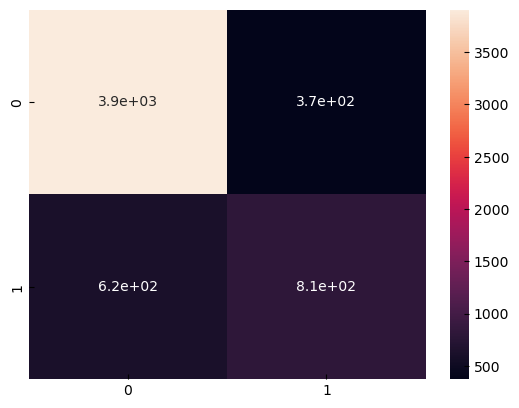

In [81]:
sns.heatmap(cm,annot=True)

In [82]:
print("-----Classification report of Logistic regression-------\n",classification_report(y_test,y_pred))

-----Classification report of Logistic regression-------
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      4278
           1       0.68      0.57      0.62      1425

    accuracy                           0.83      5703
   macro avg       0.77      0.74      0.75      5703
weighted avg       0.82      0.83      0.82      5703



In [83]:
y_prob=log_model.predict_proba(x_test)[:,1]

In [84]:
y_prob

array([0.11997881, 0.00204402, 0.15523153, ..., 0.0064837 , 0.0781546 ,
       0.57893599])

# GradientBoostingClassifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc = GradientBoostingClassifier()

In [87]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [88]:
gbc_predict = gbc.predict(x_test)

In [89]:
gbc_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [90]:
print("Accuracy is " ,round(accuracy_score(y_test,gbc_predict)*100 ,2),"%")
print("Precision is " ,round(precision_score(y_test,gbc_predict)*100 ,2),"%")
print("Recall Score is " ,round(recall_score(y_test,gbc_predict)*100 ,2),"%")
print("F1 Score is " ,round(f1_score(y_test,gbc_predict)*100 ,2),"%")

Accuracy is  83.66 %
Precision is  70.66 %
Recall Score is  59.16 %
F1 Score is  64.4 %


In [91]:
print("-----Classification report of  GradientBoostingClassifier-------\n",classification_report(y_test,gbc_predict))

-----Classification report of  GradientBoostingClassifier-------
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4278
           1       0.71      0.59      0.64      1425

    accuracy                           0.84      5703
   macro avg       0.79      0.75      0.77      5703
weighted avg       0.83      0.84      0.83      5703



In [92]:
cm_gbc = confusion_matrix(y_test,gbc_predict)
cm_gbc

array([[3928,  350],
       [ 582,  843]], dtype=int64)

<AxesSubplot:>

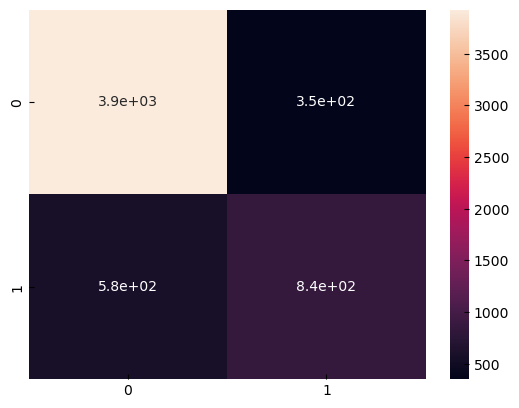

In [93]:
sns.heatmap(cm_gbc,annot=True)

# K Nearest Neighbour

In [94]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# assigning empty list
metric_k =[]
# kepping some values to neighbours 
neighbors = np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [96]:
# create a classifier using euclidean
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ="euclidean")
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

In [97]:
metric_k

[0.7971243205330528,
 0.7992284762405751,
 0.8097492547781869,
 0.8139575661932317,
 0.8136068735753113,
 0.8141329125021918,
 0.8100999473961074,
 0.8171137997545151,
 0.8157110292828336,
 0.8183412239172365,
 0.8185165702261967,
 0.8213221111695599]

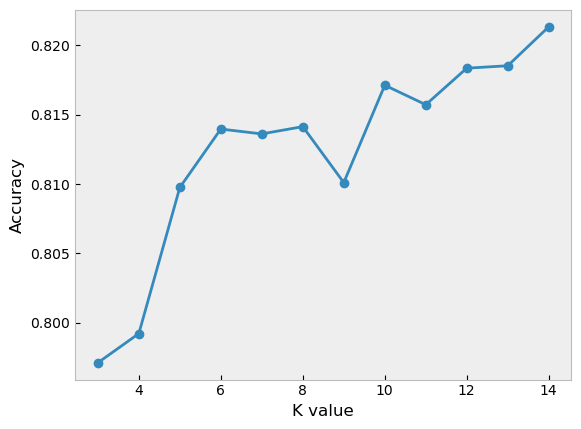

In [98]:
# plot the k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [99]:
#K = 14 has the maximum value
#put k = 14 in n_neighbors
classifier = KNeighborsClassifier(n_neighbors =14,metric ="euclidean")
classifier.fit(x_train,y_train)
knn_predict = classifier.predict(x_test)

In [100]:
print("Accuracy is " ,round(accuracy_score(y_test,knn_predict)*100 ,2),"%")
print("Precision is " ,round(precision_score(y_test,knn_predict)*100 ,2),"%")
print("Recall Score is " ,round(recall_score(y_test,knn_predict)*100 ,2),"%")
print("F1 Score is " ,round(f1_score(y_test,knn_predict)*100 ,2),"%")

Accuracy is  82.13 %
Precision is  67.09 %
Recall Score is  55.93 %
F1 Score is  61.0 %


In [101]:
print("-----Classification report of  KNeighbors Classifier-------\n",classification_report(y_test,knn_predict))

-----Classification report of  KNeighbors Classifier-------
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      4278
           1       0.67      0.56      0.61      1425

    accuracy                           0.82      5703
   macro avg       0.77      0.73      0.75      5703
weighted avg       0.81      0.82      0.82      5703



In [102]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test,knn_predict)
print("Confusion Matrix  \n",confusion_matrix_knn)

Confusion Matrix  
 [[3887  391]
 [ 628  797]]


<AxesSubplot:>

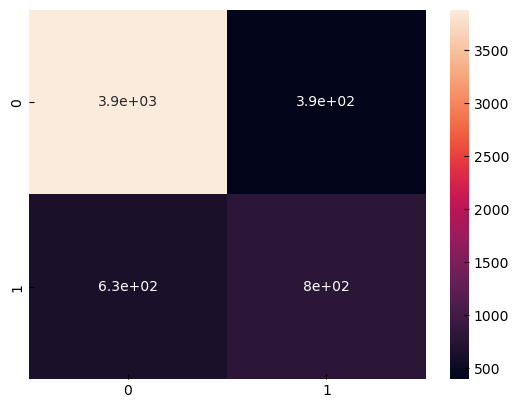

In [103]:
sns.heatmap(confusion_matrix_knn,annot=True)

# SVM

In [104]:
#import 
from sklearn.svm import SVC

In [105]:
# svm using linear kernel
svm_cls = SVC(kernel = "linear")
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [106]:
print("Accuracy is " ,round(accuracy_score(y_test,y_pred_svm)*100 ,2),"%")
print("Precision is " ,round(precision_score(y_test,y_pred_svm)*100 ,2),"%")
print("Recall Score is " ,round(recall_score(y_test,y_pred_svm)*100 ,2),"%")
print("F1 Score is " ,round(f1_score(y_test,y_pred_svm)*100 ,2),"%")

Accuracy is  82.66 %
Precision is  67.84 %
Recall Score is  58.18 %
F1 Score is  62.64 %


In [107]:
print("-----Classification report of  SVM(Linear)-------\n",classification_report(y_test,y_pred_svm))

-----Classification report of  SVM(Linear)-------
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4278
           1       0.68      0.58      0.63      1425

    accuracy                           0.83      5703
   macro avg       0.77      0.74      0.76      5703
weighted avg       0.82      0.83      0.82      5703



In [108]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix  \n",confusion_matrix_svm)

Confusion Matrix  
 [[3885  393]
 [ 596  829]]


<AxesSubplot:>

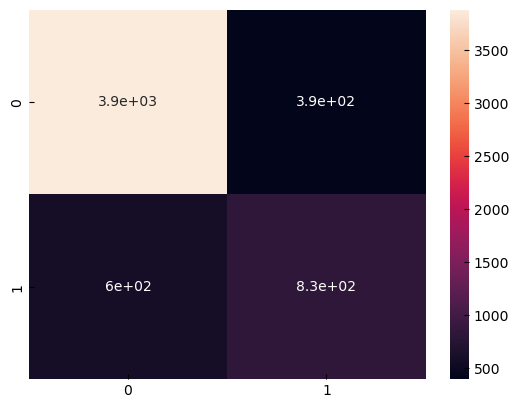

In [109]:
sns.heatmap(confusion_matrix_svm,annot=True)

# RBF

In [110]:
# SVM using RBF kernel
svm_cls1 = SVC(kernel = "rbf",random_state = 42)
svm_cls1 = svm_cls1.fit(x_train,y_train)
y_pred_rbf = svm_cls1.predict(x_test)

In [111]:
print("Accuracy is " ,round(accuracy_score(y_test,y_pred_rbf)*100 ,2),"%")
print("Precision is " ,round(precision_score(y_test,y_pred_rbf)*100 ,2),"%")
print("Recall Score is " ,round(recall_score(y_test,y_pred_rbf)*100 ,2),"%")
print("F1 Score is " ,round(f1_score(y_test,y_pred_rbf)*100 ,2),"%")

Accuracy is  82.54 %
Precision is  69.27 %
Recall Score is  54.11 %
F1 Score is  60.76 %


In [112]:
print("-----Classification report of  SVM (RBF)-------\n",classification_report(y_test,y_pred_rbf))

-----Classification report of  SVM (RBF)-------
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4278
           1       0.69      0.54      0.61      1425

    accuracy                           0.83      5703
   macro avg       0.78      0.73      0.75      5703
weighted avg       0.82      0.83      0.82      5703



In [113]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_rbf = confusion_matrix(y_test,y_pred_rbf)
print("Confusion Matrix  \n",confusion_matrix_rbf)

Confusion Matrix  
 [[3936  342]
 [ 654  771]]


<AxesSubplot:>

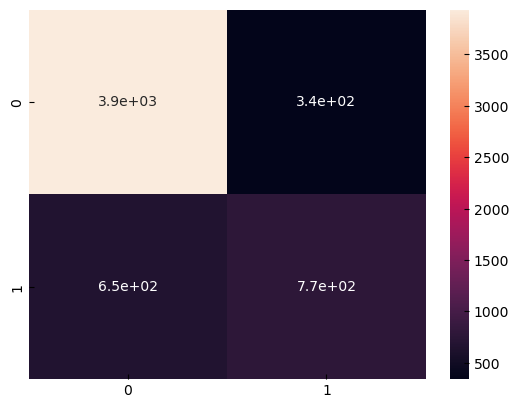

In [114]:
sns.heatmap(confusion_matrix_rbf,annot=True)

# Decision Tree

In [115]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier() 
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [116]:
print("Accuracy is " ,round(accuracy_score(y_test,y_pred_dt)*100 ,2),"%")
print("Precision is " ,round(precision_score(y_test,y_pred_dt)*100 ,2),"%")
print("Recall Score is " ,round(recall_score(y_test,y_pred_dt)*100 ,2),"%")
print("F1 Score is " ,round(f1_score(y_test,y_pred_dt)*100 ,2),"%")

Accuracy is  76.26 %
Precision is  52.54 %
Recall Score is  51.51 %
F1 Score is  52.02 %


In [117]:
print("-----Classification report of Decision Tree-------\n",classification_report(y_test,y_pred_dt))

-----Classification report of Decision Tree-------
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      4278
           1       0.53      0.52      0.52      1425

    accuracy                           0.76      5703
   macro avg       0.68      0.68      0.68      5703
weighted avg       0.76      0.76      0.76      5703



In [118]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_dt = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix  \n",confusion_matrix_dt)

Confusion Matrix  
 [[3615  663]
 [ 691  734]]


<AxesSubplot:>

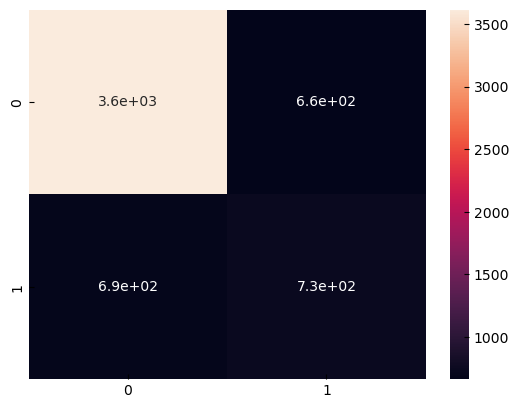

In [119]:
sns.heatmap(confusion_matrix_dt,annot=True)

# Random Forest

In [120]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [121]:
print("Accuracy is " ,round(accuracy_score(y_test,y_pred_rf)*100 ,2),"%")
print("Precision is " ,round(precision_score(y_test,y_pred_rf)*100 ,2), "%")
print("Recall Score is " ,round(recall_score(y_test,y_pred_rf)*100 , 2),"%")
print("F1 Score is " ,round(f1_score(y_test,y_pred_rf)*100 ,2),"%")

Accuracy is  79.77 %
Precision is  60.85 %
Recall Score is  53.33 %
F1 Score is  56.84 %


In [122]:
print("-----Classification report of Random Forest-------\n",classification_report(y_test,y_pred_rf))

-----Classification report of Random Forest-------
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4278
           1       0.61      0.53      0.57      1425

    accuracy                           0.80      5703
   macro avg       0.73      0.71      0.72      5703
weighted avg       0.79      0.80      0.79      5703



In [123]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix  \n",confusion_matrix_rf)

Confusion Matrix  
 [[3789  489]
 [ 665  760]]


<AxesSubplot:>

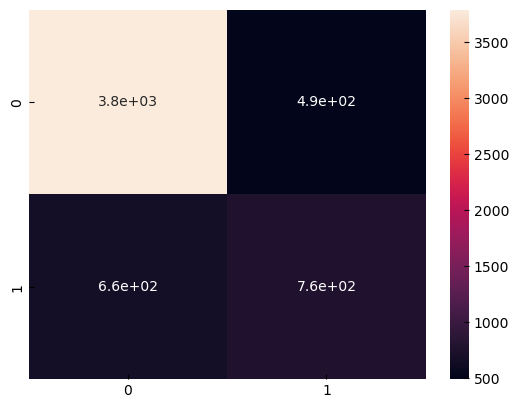

In [124]:
sns.heatmap(confusion_matrix_rf,annot=True)

After performing various classification techniques I can conclude all the models had an accuracy ranging from 76% to 83%. Out of which GradientBoostingClassifier gave a slightly better accuracy of 83.24%

# Prediction with GradientBoostingClassifier (gbc_predict)

In [125]:
#Create a dataFrame with actual values and predcited values
predicted_values = pd.DataFrame({"Actual Salary":y_test,"Predicted Salary":gbc_predict})

In [126]:
# Printing the predicted values
predicted_values

,Actual Salary,Predicted Salary
13704,0,0
18784,0,0
2350,0,0
3491,0,0
11235,0,0
...,...,...
30080,0,0
1861,0,0
394,0,0
27665,0,0
